In [4]:
import numpy as np 
import matplotlib
import math


# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import skimage
import PIL
import scipy
import cv2
import os
%matplotlib inline

import matplotlib.image as mpimg
import scipy.signal as signal


TypeError: Image data cannot be converted to float

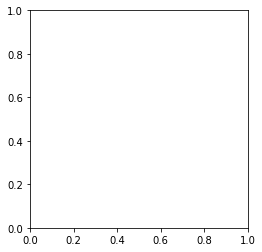

In [5]:
def displayImage(image):
 plt.imshow(image)
# plt.show()

image = cv2.imread('TheDoor.jpg')
displayImage(image)

In [2]:
inFile = 'TheDoor.jpg'
img = plt.imread(inFile)
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'TheDoor.jpg'

In [3]:
# Lets you interactively select a fixation point ("ginput")

%matplotlib tk
in_file = 'TheDoor.jpg'
img = plt.imread(in_file)
plt.imshow(img)

print("Please click")
selected = np.round(np.array(plt.ginput(1)))
print("Clicked:", selected)

img.shape



FileNotFoundError: [Errno 2] No such file or directory: 'TheDoor.jpg'

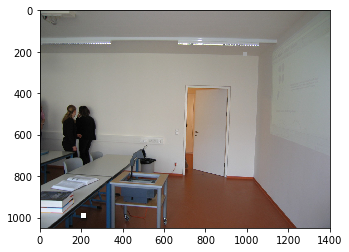

In [5]:
%matplotlib inline
img_adjusted = img.copy()
img_adjusted[200:220, 980:1000] = 160 # gray
img_adjusted[980:1000, 200:220] = 255 # white
plt.imshow(img_adjusted)

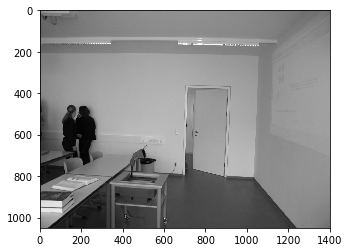

In [6]:
# Conversion to Grayscale
%matplotlib inline

from skimage.color import rgb2gray
img_g_float = rgb2gray(img)
plt.imshow(img_g_float, cmap="gray")




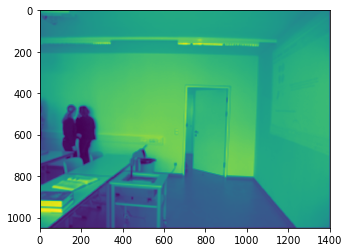

In [7]:
# Linear Filters - I: blurring

from scipy import ndimage

img.dtype

filter_matrix = np.ones((10,10))/100
img_filtered = ndimage.convolve(img_g_float, filter_matrix, mode='constant', cval=0.0)
plt.imshow(img_filtered)

[[ 0.52296039  1.57280275  2.10360627  2.11144941  2.11537098]
 [ 0.51903882  1.56103804  2.09184157  2.10360627  2.10752784]
 [ 0.          0.          0.          0.          0.00392157]
 [ 0.01176471  0.03137255  0.03529412  0.03529412  0.04313725]
 [ 0.00727765  0.02183294  0.03303216  0.03695373  0.03303216]
 [-0.00448706 -0.00953961 -0.00618353 -0.00618353 -0.01402667]]


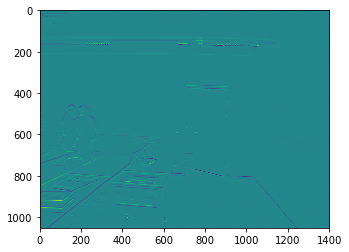

In [8]:
# Linear Filters - II: Edge Detection

Filter = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])
from scipy import ndimage
from scipy.signal import convolve2d
from scipy.ndimage import convolve

filtered = convolve2d(img_g_float, Filter.T)
filtered_b = convolve(img_g_float, Filter.T)
print(filtered[:6, :5])
plt.imshow(filtered)
# plt.imshow(filtered_b)

(1050, 1400)


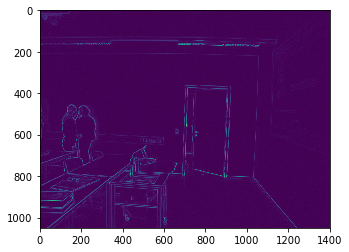

In [9]:
from skimage import filters
filtered = filters.sobel(img_g_float)
plt.imshow(filtered)
print(img_g_float.shape)

For my own reference...Receptive field functions
-------------------

The two dimensional gaussian function is used in image processing as blurring filter.
$$\phi(x,y) = \frac{1}{2\pi\sigma^2}\exp{(-\frac{1}{2\pi\sigma^2}(x^2+ y^2))}$$

For an *on-center cell*, illuminating the immediate surrounding excities the ganglion cell, and illuminating the surrounding area inhibits the cell. Mathematically, we can describe this behavior with a *Difference Of Gaussian (DOG)*-function:

$f(x;\sigma) = \frac{1}{\sigma_1\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_1^2} \right)-\frac{1}{\sigma_2\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_2^2} \right)$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/MexicanHat_Function.png" style="width: 600px;" align="left"/>

The values of $\sigma _{1}$ $\sigma _{2}$ have a ratio of approximately 1:1.6, but vary as a function of eccentricity.


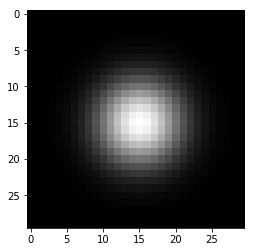

In [21]:
# The gaussian function is circular symmetric, leading to excitation of a centered pixel from nearby pixels in convolution.

def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))

"""make matrix from function"""
def receptiveFieldMatrix(func):
    h = 30 # height
    g = np.zeros((h,h)) # grid
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-h/2
            y = yi-h/2
            g[xi, yi] = func(x,y)
    return g

def plotFilter(show):
    g = receptiveFieldMatrix(show) 
    plt.imshow(g, cmap="gray")
    
plotFilter(lambda x,y:gaussian2D(x,y,4)) #standard deviation = 4

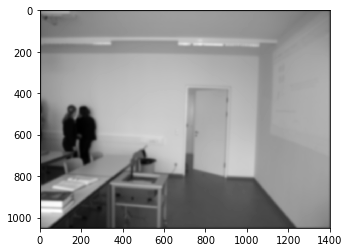

In [19]:
# Convolution is the process of applying the filter to the input, which is the image I(x,y) denoting the grey value of the pixel at the specified position.
# When applying the gaussian filter every neuron in the output layer is excited by nearby image neurons.

Img_Gaussian = signal.convolve(img_g_float,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,5)), mode='same')
imgplot = plt.imshow(Img_Gaussian, cmap="gray")


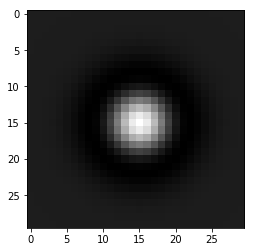

In [12]:
# Difference of Gaussians
# The mexican hat function is a difference of gaussians, which leads to an on-center, off-surround receptive field, found in retinal ganglion cells or LGN neurons. It can be seen as a basic edge detector.


def mexicanHat(x,y,sigma1,sigma2): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma2)

plotFilter(lambda x,y: mexicanHat(x,y,3,4))

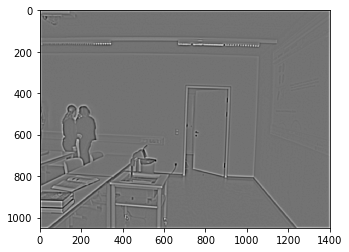

In [13]:
Img_MexicanHat = signal.convolve(img_g_float,receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,3,4)), mode='same')
imgplot = plt.imshow(Img_MexicanHat, cmap="gray")